In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from itertools import groupby
import random
from tqdm import tqdm
pd.options.plotting.backend = "plotly"

In [2]:
random.seed(2020)
many_graphs = [nx.fast_gnp_random_graph(random.randint(10, 50), 0.5, directed=True) for _ in range(100)]

In [3]:
og = []
for i in tqdm(range(len(many_graphs))):
    og.append(many_graphs[i].order())

100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


In [4]:
og[8]

11

In [5]:
g = many_graphs[8]

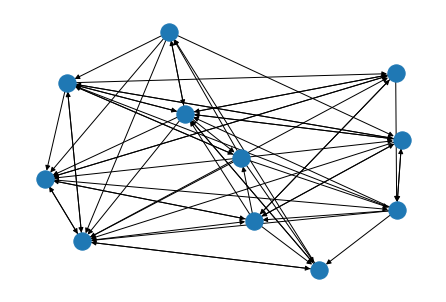

In [6]:
nx.draw(g)

In [7]:
nx.density(many_graphs[8])

0.5363636363636364

In [8]:
nx.average_degree_connectivity(many_graphs[8])

{9: 5.222222222222222,
 10: 7.15,
 8: 6.125,
 13: 3.923076923076923,
 11: 5.090909090909091,
 12: 5.75,
 15: 5.466666666666667}

In [9]:
np.mean(nx.degree(many_graphs[8]))

7.863636363636363

In [10]:
np.nanmean(many_graphs[8].degree())

7.863636363636363

In [11]:
np.nanmean([val for (node, val) in many_graphs[8].degree()])

10.727272727272727

In [12]:
nx.average_shortest_path_length(many_graphs[8])

1.481818181818182

In [13]:
nx.radius(many_graphs[8])

2

In [14]:
nx.diameter(many_graphs[8])

3

In [15]:
nx.degree_centrality(many_graphs[8])

{0: 0.9,
 1: 1.0,
 2: 0.8,
 3: 1.0,
 4: 1.3,
 5: 1.1,
 6: 1.1,
 7: 1.1,
 8: 0.8,
 9: 1.2000000000000002,
 10: 1.5}

Define a function to round off dict values

In [16]:
def round_dict(x):
    values1 = list(x.values())
    values1 = [round(num, 2) for num in values1]
    keys1 = x.keys()
    ans = dict( zip( keys1, values1))
    return ans

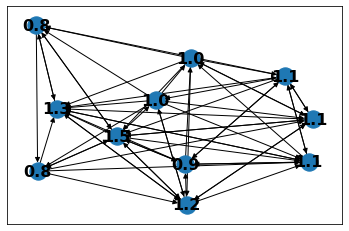

In [17]:
nx.draw_networkx(many_graphs[8], 
                 labels=round_dict(nx.degree_centrality(many_graphs[8])), 
                 font_size = 16, 
                 font_weight='bold')

In [18]:
nx.in_degree_centrality(many_graphs[8])

{0: 0.5,
 1: 0.4,
 2: 0.5,
 3: 0.30000000000000004,
 4: 0.8,
 5: 0.6000000000000001,
 6: 0.5,
 7: 0.7000000000000001,
 8: 0.30000000000000004,
 9: 0.6000000000000001,
 10: 0.7000000000000001}

In [19]:
for key, value in nx.in_degree_centrality(many_graphs[8]).items():
    print(round(value,2))

0.5
0.4
0.5
0.3
0.8
0.6
0.5
0.7
0.3
0.6
0.7


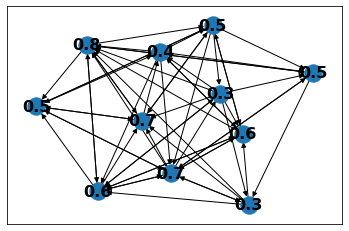

In [20]:
nx.draw_networkx(many_graphs[8], 
                 labels=round_dict(nx.in_degree_centrality(many_graphs[8])), 
                 font_size = 16, 
                 font_weight='bold')

In [21]:
nx.closeness_centrality(many_graphs[8])

{0: 0.6666666666666666,
 1: 0.5882352941176471,
 2: 0.6666666666666666,
 3: 0.5882352941176471,
 4: 0.8333333333333334,
 5: 0.7142857142857143,
 6: 0.6666666666666666,
 7: 0.7692307692307693,
 8: 0.5555555555555556,
 9: 0.7142857142857143,
 10: 0.7692307692307693}

In [22]:
round_dict(nx.closeness_centrality(many_graphs[8]))

{0: 0.67,
 1: 0.59,
 2: 0.67,
 3: 0.59,
 4: 0.83,
 5: 0.71,
 6: 0.67,
 7: 0.77,
 8: 0.56,
 9: 0.71,
 10: 0.77}

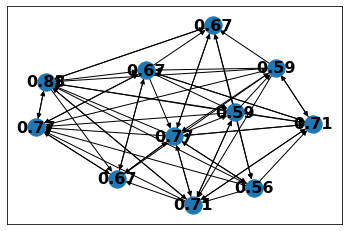

In [23]:
nx.draw_networkx(many_graphs[8], 
                 labels=round_dict(nx.closeness_centrality(many_graphs[8])), 
                 font_size = 16, 
                 font_weight='bold')

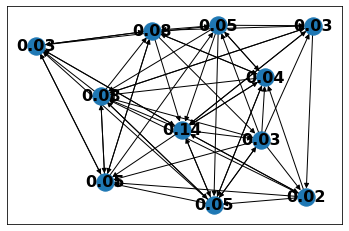

In [24]:
nx.draw_networkx(many_graphs[8], 
                 labels=round_dict(nx.betweenness_centrality(many_graphs[8])), 
                 font_size = 16, 
                 font_weight='bold')

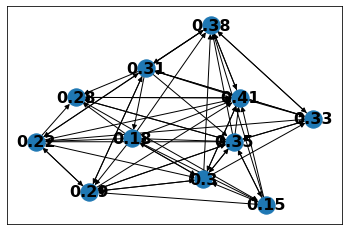

In [25]:
nx.draw_networkx(many_graphs[8], 
                 labels=round_dict(nx.eigenvector_centrality(many_graphs[8])), 
                 font_size = 16, 
                 font_weight='bold')

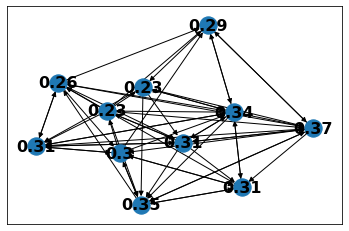

In [26]:
nx.draw_networkx(many_graphs[8], 
                 labels=round_dict(nx.katz_centrality(many_graphs[8])), 
                 font_size = 16, 
                 font_weight='bold')

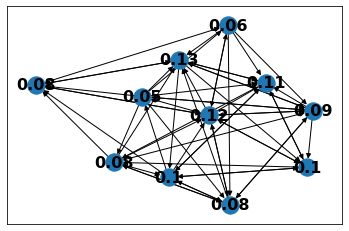

In [27]:
nx.draw_networkx(many_graphs[8], 
                 labels=round_dict(nx.pagerank(many_graphs[8])), 
                 font_size = 16, 
                 font_weight='bold')

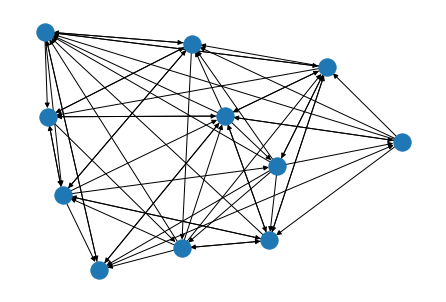

In [28]:
nx.draw(many_graphs[8])

In [29]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

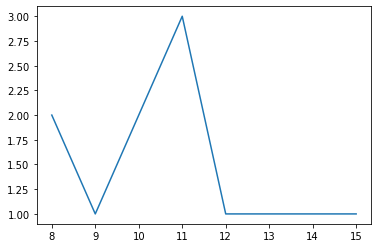

In [30]:
plt.plot(deg,cnt)

In [31]:
def global_metrics(g):
    nodes = g.order()
    edges = g.number_of_edges()
    self = nx.number_of_selfloops(g)
    max_degree = np.max([val for (node, val) in g.degree()])
    min_degree = np.min([val for (node, val) in g.degree()])
    mean_degree = np.nanmean([val for (node, val) in g.degree()])
    median_degree = np.median([val for (node, val) in g.degree()])
    std_degree = np.std([val for (node, val) in g.degree()])
    avg_effective_size = np.nanmean(list(nx.effective_size(g).values()))
    edge_density = nx.density(g)
    largest_clique_size = large_clique_size(g.to_undirected())
    cliques = nx.number_of_cliques(g.to_undirected(g))
    no_largest_cliques = len({k: v for k, v in cliques.items() if v == largest_clique_size})
    no_cliques = len(number_of_cliques(g.to_undirected()))
    largest_clique_nodes = max(number_of_cliques(g.to_undirected()).values())
    no_triangles = len(nx.triangles(g.to_undirected()))
    largest_triangle_nodes = max(nx.triangles(g.to_undirected()).values())
    global_reaching_centrality = nx.global_reaching_centrality(g)
    global_efficiency = nx.global_efficiency(g.to_undirected())
    avg_clustering_coef = nx.average_clustering(g)
    transitivity = nx.transitivity(g)
    avg_square_clustering = np.nanmean(list(nx.square_clustering(g).values()))
    no_conn_comp = nx.number_connected_components(g.to_undirected())
    Gcc = sorted(nx.connected_components(g.to_undirected()), key=len, reverse=True)
    largest_conn_comp_size = g.subgraph(Gcc[0]).size()
    avg_path_length = nx.average_shortest_path_length(g)

    gmetrics = [nodes, edges, self, max_degree, min_degree, mean_degree, median_degree,
                std_degree, avg_effective_size, avg_path_length, 
                edge_density, largest_clique_size,
                no_largest_cliques, no_cliques, largest_clique_nodes, no_triangles, largest_triangle_nodes,
                global_reaching_centrality, global_efficiency, avg_clustering_coef, transitivity, avg_square_clustering,
                no_conn_comp, largest_conn_comp_size
               ]
    return(gmetrics)

In [32]:
from networkx.algorithms.approximation.clique import large_clique_size
from networkx.algorithms.clique import number_of_cliques

In [33]:
nodes = g.order()
print('Number of Nodes:', nodes)

Number of Nodes: 11


In [34]:
edges = g.number_of_edges()
print('Number of Edges:', edges)

Number of Edges: 59


In [35]:
self = nx.number_of_selfloops(g)
print('Number of Self Loops:', self)

Number of Self Loops: 0


In [36]:
max_degree = np.max([val for (node, val) in g.degree()])
print('Maximum Degree:', max_degree)

Maximum Degree: 15


In [37]:
min_degree = np.min([val for (node, val) in g.degree()])
print('Minimum Degree:', min_degree)

Minimum Degree: 8


In [38]:
mean_degree = np.nanmean([val for (node, val) in g.degree()])
print('Mean Degree:', mean_degree)

Mean Degree: 10.727272727272727


In [39]:
median_degree = np.median([val for (node, val) in g.degree()])
print('Median Degree:', median_degree)

Median Degree: 11.0


In [40]:
std_degree = np.std([val for (node, val) in g.degree()])
print('STD Degree:', std_degree)

STD Degree: 2.004127971368055


In [41]:
avg_effective_size = np.nanmean(list(nx.effective_size(g).values()))
print('Avg. Effective Size:', avg_effective_size)

Avg. Effective Size: 4.299035812672177


In [42]:
avg_path_length = nx.average_shortest_path_length(g)
print('Avg. Path Length:', avg_path_length)

Avg. Path Length: 1.481818181818182


In [43]:
edge_density = nx.density(g)
print('Edge Density:', edge_density)

Edge Density: 0.5363636363636364


In [44]:
largest_clique_size = large_clique_size(g.to_undirected())
print('Largest Clique Size:', largest_clique_size)

Largest Clique Size: 6


In [45]:
cliques = nx.number_of_cliques(g.to_undirected(g))
no_largest_cliques = len({k: v for k, v in cliques.items() if v == largest_clique_size})
print('No. of Largest Cliques:', no_largest_cliques)

No. of Largest Cliques: 0


In [46]:
no_cliques = len(number_of_cliques(g.to_undirected()))
print('No. of Cliques:', no_cliques)

No. of Cliques: 11


In [47]:
largest_clique_nodes = max(number_of_cliques(g.to_undirected()).values())
print('Largest Clique Nodes:', largest_clique_nodes)

Largest Clique Nodes: 10


In [48]:
no_triangles = len(nx.triangles(g.to_undirected()))
print('No. of Triangles:', no_triangles)

No. of Triangles: 11


In [49]:
largest_triangle_nodes = max(nx.triangles(g.to_undirected()).values())
print('Largest Triangle Nodes:', largest_triangle_nodes)

Largest Triangle Nodes: 34


In [50]:
global_reaching_centrality = nx.global_reaching_centrality(g)
print('Global Reaching Centrality:', global_reaching_centrality)

Global Reaching Centrality: 0.0


In [51]:
global_efficiency = nx.global_efficiency(g.to_undirected())
print('Global Efficiency:', global_efficiency)

Global Efficiency: 0.9


In [52]:
avg_clustering_coef = nx.average_clustering(g)
print('Avg. Clustering Coef:', avg_clustering_coef)

Avg. Clustering Coef: 0.5299324566462742


In [53]:
transitivity = nx.transitivity(g)
print('Transitivity:', transitivity)

Transitivity: 0.5287769784172662


In [54]:
avg_square_clustering = np.nanmean(list(nx.square_clustering(g).values()))
print('Avg. Square Clustering:', avg_square_clustering)

Avg. Square Clustering: 0.5262928270608831


In [55]:
no_conn_comp = nx.number_connected_components(g.to_undirected())
print('No. of Connected Components:', no_conn_comp)

No. of Connected Components: 1


In [56]:
Gcc = sorted(nx.connected_components(g.to_undirected()), key=len, reverse=True)
largest_conn_comp_size = g.subgraph(Gcc[0]).size()
print('Largest Connected Component Size:', largest_conn_comp_size)

Largest Connected Component Size: 59


In [57]:
gmetrics = np.zeros((100,24), dtype='float')
for i in tqdm(range(len(many_graphs))):
    gmetrics[i,:] = global_metrics(many_graphs[i])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [06:25<00:00,  3.86s/it]


In [58]:
gdf = pd.DataFrame(gmetrics)
gdf.columns = ['nodes', 'edges', 'self', 'max_degree', 'min_degree', 'mean_degree', 'median_degree',
                'std_degree', 'avg_effective_size','avg_path_length', 
                'edge_density', 'largest_clique_size',
                'no_largest_cliques', 'no_cliques', 'largest_clique_nodes', 'no_triangles', 'largest_triangle_nodes',
                'global_reaching_centrality', 'global_efficiency', 'avg_clustering_coef', 'transitivity', 'avg_square_clustering',
                'no_conn_comp', 'largest_conn_comp_size'
               ]
gdf.head()

,nodes,edges,self,max_degree,min_degree,mean_degree,median_degree,std_degree,avg_effective_size,avg_path_length,...,largest_clique_nodes,no_triangles,largest_triangle_nodes,global_reaching_centrality,global_efficiency,avg_clustering_coef,transitivity,avg_square_clustering,no_conn_comp,largest_conn_comp_size
0,49.0,1235.0,0.0,65.0,38.0,50.408163,50.0,4.923572,18.220958,1.474915,...,5003.0,49.0,718.0,0.0,0.888605,0.526611,0.525582,0.098269,1.0,1235.0
1,50.0,1210.0,0.0,60.0,38.0,48.400000,48.5,4.547527,19.056934,1.506122,...,5418.0,50.0,736.0,0.0,0.873469,0.492247,0.491197,0.084132,1.0,1210.0
2,21.0,223.0,0.0,27.0,18.0,21.238095,21.0,2.580232,8.218983,1.469048,...,48.0,21.0,139.0,0.0,0.909524,0.530759,0.532648,0.259659,1.0,223.0
3,32.0,495.0,0.0,40.0,24.0,30.937500,30.0,3.690677,12.458393,1.501008,...,428.0,32.0,269.0,0.0,0.885081,0.501075,0.498915,0.140605,1.0,495.0
4,48.0,1144.0,0.0,57.0,38.0,47.666667,48.0,4.543004,18.060797,1.492908,...,3795.0,48.0,646.0,0.0,0.878103,0.505542,0.504497,0.092448,1.0,1144.0


In [59]:
gdf.shape

(100, 24)

In [60]:
gdf.to_csv('global_metrics_dataframe.csv', index=False)

In [61]:
from sklearn.ensemble import IsolationForest
# fit the model
n_features = gdf.shape[1]
isof = IsolationForest(n_estimators=1000, max_samples='auto', contamination='auto', 
                        max_features=n_features, bootstrap=False, n_jobs=-1, random_state=2019, verbose=1, behaviour='new')
isof.fit(gdf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.9s remaining:    1.9s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.9s finished


IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=24, max_samples='auto', n_estimators=1000,
                n_jobs=-1, random_state=2019, verbose=1, warm_start=False)

In [62]:
anomaly_score = isof.decision_function(gdf)
anomaly_score_new = np.interp(anomaly_score, (anomaly_score.min(), anomaly_score.max()), (0, 1))

In [63]:
gdf['anomaly_score_new'] = anomaly_score_new
gdf = gdf.sort_values(by='anomaly_score_new', ascending=True)

In [64]:
gdf.head()

,nodes,edges,self,max_degree,min_degree,mean_degree,median_degree,std_degree,avg_effective_size,avg_path_length,...,no_triangles,largest_triangle_nodes,global_reaching_centrality,global_efficiency,avg_clustering_coef,transitivity,avg_square_clustering,no_conn_comp,largest_conn_comp_size,anomaly_score_new
15,10.0,43.0,0.0,11.0,7.0,8.600000,8.0,1.743560,3.872872,1.555556,...,10.0,19.0,0.0,0.844444,0.445985,0.455128,0.437502,1.0,43.0,0.000000
18,11.0,53.0,0.0,14.0,7.0,9.636364,9.0,2.226809,3.873011,1.590909,...,11.0,29.0,0.0,0.854545,0.542429,0.532110,0.704518,1.0,53.0,0.052054
5,47.0,1166.0,0.0,66.0,41.0,49.617021,49.0,4.460480,17.211522,1.460685,...,47.0,740.0,0.0,0.893617,0.540056,0.540244,0.105800,1.0,1166.0,0.141035
26,50.0,1271.0,0.0,62.0,41.0,50.840000,51.0,4.627570,18.696681,1.481224,...,50.0,796.0,0.0,0.885306,0.519195,0.519098,0.091952,1.0,1271.0,0.155822
8,11.0,59.0,0.0,15.0,8.0,10.727273,11.0,2.004128,4.299036,1.481818,...,11.0,34.0,0.0,0.900000,0.529932,0.528777,0.526293,1.0,59.0,0.199404


In [65]:
gdf.tail()

,nodes,edges,self,max_degree,min_degree,mean_degree,median_degree,std_degree,avg_effective_size,avg_path_length,...,no_triangles,largest_triangle_nodes,global_reaching_centrality,global_efficiency,avg_clustering_coef,transitivity,avg_square_clustering,no_conn_comp,largest_conn_comp_size,anomaly_score_new
78,39.0,751.0,0.0,48.0,28.0,38.512821,39.0,4.235817,14.686031,1.493252,...,39.0,397.0,0.0,0.878543,0.508177,0.511895,0.114348,1.0,751.0,0.970852
48,34.0,568.0,0.0,41.0,25.0,33.411765,34.0,3.919166,12.911774,1.493761,...,34.0,308.0,0.0,0.879679,0.504876,0.508102,0.135539,1.0,568.0,0.987479
60,36.0,645.0,0.0,47.0,27.0,35.833333,35.5,4.444097,13.338542,1.488095,...,36.0,368.0,0.0,0.876190,0.512275,0.507492,0.131916,1.0,645.0,0.989367
90,38.0,717.0,0.0,46.0,30.0,37.736842,38.0,3.675554,14.309661,1.490043,...,38.0,415.0,0.0,0.879801,0.507067,0.510417,0.119196,1.0,717.0,0.997209
74,37.0,681.0,0.0,46.0,25.0,36.810811,38.0,4.267019,13.970738,1.488739,...,37.0,369.0,0.0,0.881381,0.510511,0.509880,0.126958,1.0,681.0,1.000000


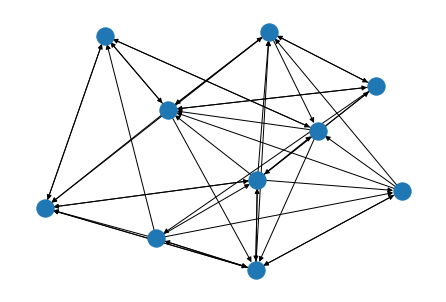

In [66]:
nx.draw(many_graphs[15])

In [67]:
global_metrics(many_graphs[15])

[10,
 43,
 0,
 11,
 7,
 8.6,
 8.0,
 1.7435595774162693,
 3.872871572871573,
 1.5555555555555556,
 0.4777777777777778,
 6,
 1,
 10,
 6,
 10,
 19,
 0.0,
 0.8444444444444444,
 0.4459849627496686,
 0.4551282051282051,
 0.437501605385237,
 1,
 43]

In [68]:
gdf.columns

Index(['nodes', 'edges', 'self', 'max_degree', 'min_degree', 'mean_degree',
       'median_degree', 'std_degree', 'avg_effective_size', 'avg_path_length',
       'edge_density', 'largest_clique_size', 'no_largest_cliques',
       'no_cliques', 'largest_clique_nodes', 'no_triangles',
       'largest_triangle_nodes', 'global_reaching_centrality',
       'global_efficiency', 'avg_clustering_coef', 'transitivity',
       'avg_square_clustering', 'no_conn_comp', 'largest_conn_comp_size',
       'anomaly_score_new'],
      dtype='object')

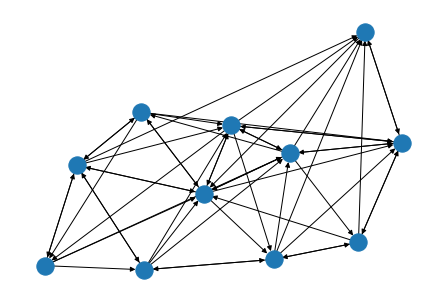

In [69]:
nx.draw(many_graphs[18])

In [70]:
global_metrics(many_graphs[18])

[11,
 53,
 0,
 14,
 7,
 9.636363636363637,
 9.0,
 2.2268088570756164,
 3.8730109536927726,
 1.5909090909090908,
 0.4818181818181818,
 6,
 1,
 11,
 9,
 11,
 29,
 0.0,
 0.8545454545454545,
 0.5424289692628593,
 0.5321100917431193,
 0.7045182161165512,
 1,
 53]

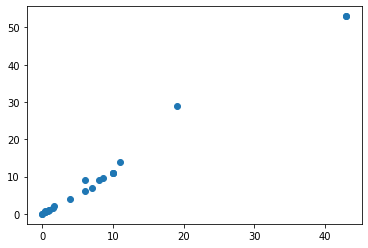

In [71]:
plt.scatter(global_metrics(many_graphs[15]), global_metrics(many_graphs[18]))

In [72]:
np.corrcoef(global_metrics(many_graphs[15]), global_metrics(many_graphs[18]))

array([[1.        , 0.99556969],
       [0.99556969, 1.        ]])

In [77]:
gdft1 = gdf.loc[{15,18},:].T
gdft1.boxplot()

In [78]:
similar = pd.DataFrame(dict(g15=global_metrics(many_graphs[15]), g18=global_metrics(many_graphs[18])))
similar.index = gdf.columns[0:-1]
similar = similar.sort_values(by='g18', ascending=False)
sfig = similar.plot.bar(barmode="group")
sfig.show()

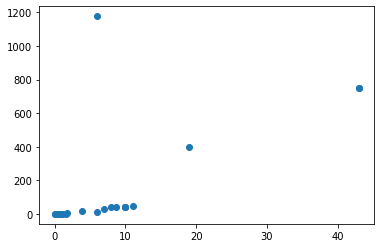

In [79]:
plt.scatter(global_metrics(many_graphs[15]), global_metrics(many_graphs[78]))

In [80]:
np.corrcoef(global_metrics(many_graphs[15]), global_metrics(many_graphs[78]))

array([[1.        , 0.64963839],
       [0.64963839, 1.        ]])

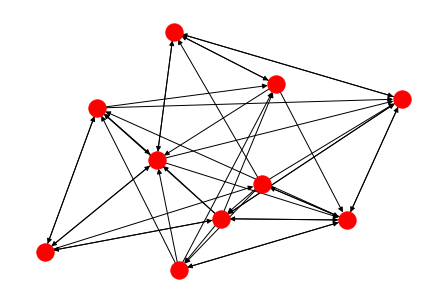

In [81]:
nx.draw(many_graphs[15], node_color='red')

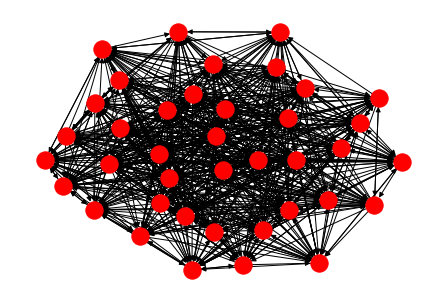

In [82]:
nx.draw(many_graphs[78], node_color='red')

In [83]:
gdf.loc[{15,78},:].T.boxplot()

In [84]:
dissimilar = pd.DataFrame(dict(g15=global_metrics(many_graphs[15]), g78=global_metrics(many_graphs[78])))
dissimilar.index = gdf.columns[0:-1]
dissimilar = dissimilar.sort_values(by='g78', ascending=False)
dfig = dissimilar.plot.bar(barmode="group")
dfig.show()